In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from in2stellar import Tracks, DenseNetworkGrid, set_seed
from interstellar import Tracks, DenseNetworkGrid, set_seed
%matplotlib inline

Load tracks with new MLT 2.5 grid

In [2]:
path = '/rds/projects/d/daviesgr-cartography/tanda/GPGrid/validation_data/simple_grid_vali_5d'

In [3]:
tracks = Tracks()

In [4]:
tracks.add_metadata(path)
tracks.get_metadata()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.150029,0.306814,0.132709,2.107285,0.0,1.0
1,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.114963,0.309963,-0.224260,1.829601,0.0,1.0
2,/rds/projects/d/daviesgr-cartography/tanda/GPG...,0.887027,0.297762,-0.425366,2.197228,0.0,1.0
3,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.067974,0.301516,-0.157290,1.991346,0.0,1.0
4,/rds/projects/d/daviesgr-cartography/tanda/GPG...,0.829916,0.251643,0.034208,2.350715,0.0,1.0
...,...,...,...,...,...,...,...
4874,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.087382,0.296682,0.452203,2.471708,0.0,1.0
4875,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.116738,0.288860,0.255108,1.856536,0.0,1.0
4876,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.098341,0.299830,-0.264705,1.979019,0.0,1.0
4877,/rds/projects/d/daviesgr-cartography/tanda/GPG...,1.044122,0.253827,0.454766,2.261800,0.0,1.0


In [5]:
from interstellar.tracks import DATA_COLS

print(DATA_COLS)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit']


In [6]:
cols = DATA_COLS + ['surface_he4', 'surface_Z', 'initial_Zinit']
print(cols)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit', 'surface_he4', 'surface_Z', 'initial_Zinit']


In [7]:
tracks.load_data(usecols=cols)
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
0,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.000097,0.000024,4638.434926,12.654420,5.516162,3.015324,0.306772,0.016619,0.132598,10.371859
1,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.000101,0.000024,4641.970916,12.366171,5.444671,3.026655,0.306773,0.016619,0.132608,10.580925
2,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.000103,0.000025,4644.478453,12.144450,5.389815,3.035450,0.306774,0.016619,0.132620,10.746123
3,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.000105,0.000026,4646.428764,11.973932,5.347351,3.042321,0.306775,0.016620,0.132631,10.876928
4,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.000107,0.000026,4648.057005,11.834460,5.312393,3.048018,0.306775,0.016620,0.132639,10.986558


Note, evo_stage incorrectly defined. Instead we choose to cut the data given a fractional age above 0.01

In [8]:
condition = tracks.get_data('frac_age') > 0.01
tracks.select_data(condition)

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
435,0,1.150029,0.306814,0.016620,0.132709,2.107285,1.150029,0.042021,0.010224,6288.600707,1.726106,1.108370,4.409229,0.306147,0.016591,0.131459,123.787141
436,0,1.150029,0.306814,0.016620,0.132709,2.107285,1.150029,0.045031,0.010956,6290.885266,1.726764,1.107776,4.409695,0.306048,0.016586,0.131264,123.874345
437,0,1.150029,0.306814,0.016620,0.132709,2.107285,1.150029,0.048643,0.011835,6292.621031,1.728088,1.107589,4.409841,0.305930,0.016580,0.131028,123.897390
438,1,1.150029,0.306814,0.016620,0.132709,2.107285,1.150029,0.052977,0.012890,6294.046177,1.730105,1.107733,4.409728,0.305786,0.016573,0.130742,123.867317
439,1,1.150029,0.306814,0.016620,0.132709,2.107285,1.150029,0.058179,0.014155,6295.278376,1.732630,1.108108,4.409434,0.305615,0.016564,0.130403,123.800166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017361,2,0.876133,0.288870,0.006986,-0.260989,1.857018,0.872654,11.117911,1.272263,5023.922180,3.362938,2.423999,3.609666,0.279377,0.006805,-0.277497,33.556268
5017362,2,0.876133,0.288870,0.006986,-0.260989,1.857018,0.872647,11.120070,1.272510,5022.481284,3.378784,2.431098,3.607123,0.279459,0.006806,-0.277386,33.405959
5017363,2,0.876133,0.288870,0.006986,-0.260989,1.857018,0.872641,11.122211,1.272755,5021.127043,3.394459,2.438045,3.604641,0.279628,0.006808,-0.277162,33.260488
5017364,2,0.876133,0.288870,0.006986,-0.260989,1.857018,0.872634,11.124343,1.272999,5019.723993,3.410511,2.445169,3.602104,0.279715,0.006809,-0.277048,33.111877


In [9]:
tracks.select_data(condition, inplace=True)

In [10]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit', 'initial_Zinit']
y_cols = ['star_age', 'effective_T', 'radius', 'delta_nu_fit', 'star_feh', 'surface_he4', 'surface_Z']

## Preprocessing

### Gradient

We will not be using all the data in training, because we want to have preference to data where there is high change it observables. A simple way to do this is to calculate the gradient in logg and teff for each track. We may then use this as the weights when randomly sampling the full set of tracks. For this to be effective, we need to sample a smaller number of models then the total, effectively dropping points where the gradient is low since these will be more easily learnt by the neural network.

In [11]:
def gradient(track, logg_sun=4.44, teff_sun=5777.0):
    return ((np.gradient(track['effective_T'] / teff_sun))**2.0 + \
                  (np.gradient(track['log_g'] / logg_sun))**2.0)**0.5

In [12]:
def frac_evol(track):
    return 1.0 + (track['star_age'] - track['star_age'].min()) / \
           (track['star_age'].max() - track['star_age'].min())

In [13]:
tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_evol'] = tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_age']

In [14]:
grouped = tracks._data.groupby(by=['initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit'])
cond = tracks._data.frac_age>1.0
for name, group in grouped:
    tracks._data.loc[group.index, 'gradient'] = gradient(group)
    cond = group.frac_age>1.0
    tracks._data.loc[group[cond].index, 'frac_evol'] = frac_evol(group.loc[cond])

In [15]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,gradient
435,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.042021,0.010224,6288.600707,1.726106,1.108370,4.409229,0.306147,0.016591,0.131459,123.787141,0.010224,0.000409
436,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.045031,0.010956,6290.885266,1.726764,1.107776,4.409695,0.306048,0.016586,0.131264,123.874345,0.010956,0.000355
437,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.048643,0.011835,6292.621031,1.728088,1.107589,4.409841,0.305930,0.016580,0.131028,123.897390,0.011835,0.000274
438,1,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.052977,0.012890,6294.046177,1.730105,1.107733,4.409728,0.305786,0.016573,0.130742,123.867317,0.012890,0.000235
439,1,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.058179,0.014155,6295.278376,1.732630,1.108108,4.409434,0.305615,0.016564,0.130403,123.800166,0.014155,0.000216


Below we can see many points have a small gradient.

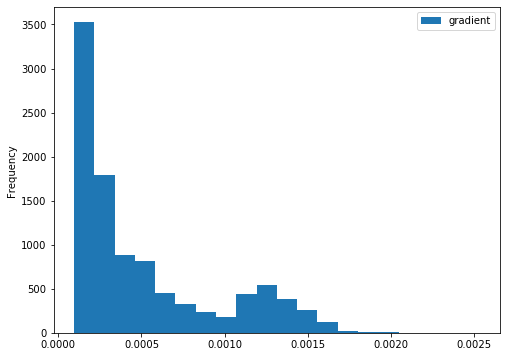

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000).plot(kind='hist', ax=ax, y='gradient', bins=20)

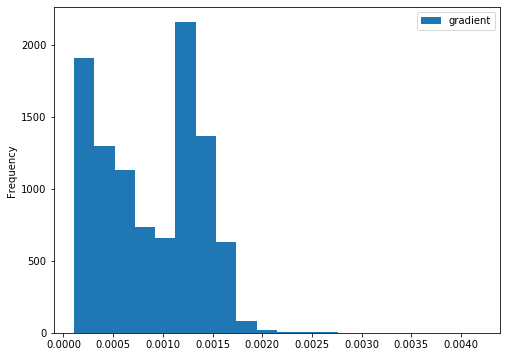

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
tracks._data.sample(n=10000, weights='gradient').plot(kind='hist', ax=ax, y='gradient', bins=20)

In [18]:
print('Length = ', len(tracks._data))

Length =  2930919


In [19]:
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,gradient
435,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.042021,0.010224,6288.600707,1.726106,1.108370,4.409229,0.306147,0.016591,0.131459,123.787141,0.010224,0.000409
436,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.045031,0.010956,6290.885266,1.726764,1.107776,4.409695,0.306048,0.016586,0.131264,123.874345,0.010956,0.000355
437,0,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.048643,0.011835,6292.621031,1.728088,1.107589,4.409841,0.305930,0.016580,0.131028,123.897390,0.011835,0.000274
438,1,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.052977,0.012890,6294.046177,1.730105,1.107733,4.409728,0.305786,0.016573,0.130742,123.867317,0.012890,0.000235
439,1,1.150029,0.306814,0.01662,0.132709,2.107285,1.150029,0.058179,0.014155,6295.278376,1.732630,1.108108,4.409434,0.305615,0.016564,0.130403,123.800166,0.014155,0.000216


In [20]:
tracks._data.drop(columns='star_mass', inplace=True)  # Drop star mass as not needed here

Reduce size by converting to 32-bit float.

In [21]:
float_cols = tracks._data.select_dtypes(float).columns

tracks._data[float_cols] = tracks._data.loc[:, float_cols].astype(np.float32)

In [22]:
tracks._data['initial_mass']

435        1.150029
436        1.150029
437        1.150029
438        1.150029
439        1.150029
             ...   
5017361    0.876133
5017362    0.876133
5017363    0.876133
5017364    0.876133
5017365    0.876133
Name: initial_mass, Length: 2930919, dtype: float32

In [23]:
tracks.name = 'tracks_test_random'

In [24]:
save_path = f'/rds/projects/d/daviesgr-alex-phd/interstellar_data/{tracks.name}'

tracks.save(save_path)

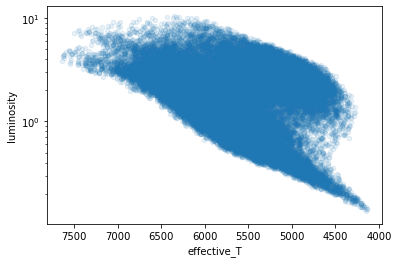

In [28]:
ax = tracks.sample_data(50000).plot('effective_T', 'luminosity', kind='scatter', alpha=0.1)
ax.invert_xaxis()
ax.set_yscale('log')